# Monte Carlo simulation
**Monte Carlo methods, or Monte Carlo experiments,** are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. [wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)

We simulate the area of $sin(x)$ from $0$ to $\pi$ that is given by $\int_{o}^{\pi} sin(x) = -cos(x) \Big|_0^{\pi} = 2 $ <br>
<br>
We can approximate the area with the formula $ (b-a) \frac{1}{N} \sum_{i=1}^{N} f(x_i)$ in our case $ (b-a) \frac{1}{N} \sum_{i=1}^{N} sin(x_i)$ <br><br>
Thanks to Andrew Dotson video https://www.youtube.com/watch?v=WAf0rqwAvgg

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Limits
a = 0 # lower
b = np.pi # upper
# Number of iterations (for 10K ≈ 2 sec, for 100K it takes 10*10 more time ≈ 3 minutes on my PC)
N = 10_000
# var to store the results
areas =[]

In [3]:
# This one is slighlty faster and recalls the LateX formula above; it takes about 2 seconds for 10_000
for _ in range(N): 
    # Apply the approximation formula
    answer = (b-a)/N * np.sin(np.random.uniform(a,b,N)).sum()
    areas.append(answer)

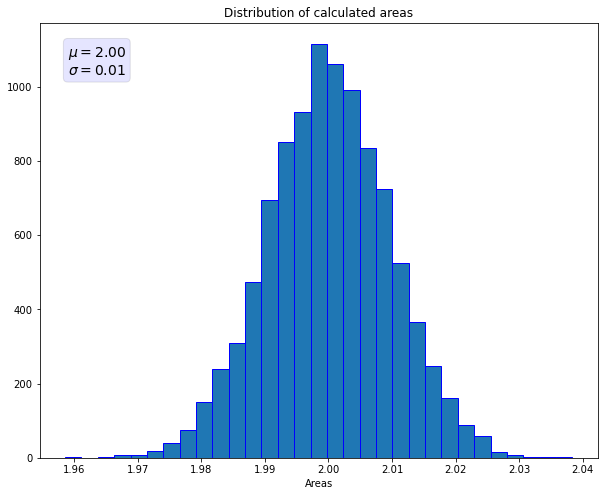

In [4]:
fig, ax = plt.subplots(figsize=(10,8))

mu = np.array(areas).mean()
sigma = np.array(areas).std()
textstr = '\n'.join((
    f'$\mu=${mu:.2f}',
    f'$\sigma=${sigma:.2f}' ))

ax.hist(areas, bins=31, ec='b')
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='blue', alpha=0.1)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.title("Distribution of calculated areas")
plt.xlabel("Areas")

plt.show()